Here we are going to use VADER Polarity Score to generate our sentimental analysis on text. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

In [2]:
df = pd.read_csv("C:/Users/admin/Downloads/metadata.csv", nrows=100)

In [3]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          100 non-null    object 
 1   sha               94 non-null     object 
 2   source_x          100 non-null    object 
 3   title             100 non-null    object 
 4   doi               100 non-null    object 
 5   pmcid             100 non-null    object 
 6   pubmed_id         100 non-null    int64  
 7   license           100 non-null    object 
 8   abstract          92 non-null     object 
 9   publish_time      100 non-null    object 
 10  authors           94 non-null     object 
 11  journal           100 non-null    object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    94 non-null     object 
 16  pmc_json_files    91 non-null     object 
 17

In [5]:
df.isna().sum()

cord_uid              0
sha                   6
source_x              0
title                 0
doi                   0
pmcid                 0
pubmed_id             0
license               0
abstract              8
publish_time          0
authors               6
journal               0
mag_id              100
who_covidence_id    100
arxiv_id            100
pdf_json_files        6
pmc_json_files        9
url                   0
s2_id               100
dtype: int64

In [6]:
#As there are 100 out of 100 null objects we can drop those columns as it does not have any impact on our analysis
df.drop(['mag_id','who_covidence_id','arxiv_id','s2_id'],axis =1,inplace = True)


In [7]:
df.isnull().sum()

cord_uid          0
sha               6
source_x          0
title             0
doi               0
pmcid             0
pubmed_id         0
license           0
abstract          8
publish_time      0
authors           6
journal           0
pdf_json_files    6
pmc_json_files    9
url               0
dtype: int64

In [8]:
df.head(2)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...


In [9]:
#Finding number of articles published by each journal
df.groupby(['journal']).size().groupby(level=0).max()

journal
AIDS Res Ther                                               1
Ann Clin Microbiol Antimicrob                               1
Aust New Zealand Health Policy                              2
BMC Bioinformatics                                          2
BMC Biotechnol                                              1
BMC Gastroenterol                                           1
BMC Genomics                                                2
BMC Infect Dis                                              2
BMC Med Ethics                                              2
BMC Mol Biol                                                1
BMC Public Health                                           8
Biol Proced Online                                          1
Cell Microbiol                                              1
Clinical Chemistry                                          1
Crit Care                                                   6
EMBO J                                                      2


We find that the Nuleic Acids Res has got the highest number of publications

In [10]:
df.groupby(['license']).size().groupby(level=0).max()

license
bronze-oa     3
cc-by        46
cc-by-nc      7
cc0           2
green-oa      4
no-cc        38
dtype: int64

Most publications i.e 46 were published under the cc-by license type compared to the cc0 type with only 2 publications

In [11]:
df.groupby(['publish_time']).size().groupby(level = 0).max()

publish_time
1997-03-03    1
2000-04-17    1
2000-08-01    1
2000-08-15    1
2000-08-25    1
             ..
2007-05-29    1
2007-05-30    1
2007-06-04    1
2007-06-06    1
2007-06-11    1
Length: 88, dtype: int64

Extracting the title and abstract column for sentiment analysis

In [12]:
metadata = df[['title','abstract']]
metadata.head()

,title,abstract
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...


In [13]:
metadata.isnull().sum()

title       0
abstract    8
dtype: int64

It shows there are 8 null objects in abstract column

In [14]:
metadata.reset_index(drop = True, inplace = True)
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     100 non-null    object
 1   abstract  92 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [15]:
metadata['text'] = metadata['title'] + metadata['abstract']
metadata

<ipython-input-15-b075f12b1d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['text'] = metadata['title'] + metadata['abstract']


,title,abstract,text
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,Clinical features of culture-proven Mycoplasma...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,Nitric oxide: a pro-inflammatory mediator in l...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,Surfactant protein-D and pulmonary host defens...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,Role of endothelin-1 in lung diseaseEndothelin...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,Gene expression in epithelial cells in respons...
...,...,...,...
95,Global Surveillance of Emerging Influenza Viru...,BACKGROUND: Effective influenza surveillance r...,Global Surveillance of Emerging Influenza Viru...
96,Transmission Parameters of the 2001 Foot and M...,"Despite intensive ongoing research, key aspect...",Transmission Parameters of the 2001 Foot and M...
97,Efficient replication of pneumonia virus of mi...,Pneumonia virus of mice (PVM; family Paramyxov...,Efficient replication of pneumonia virus of mi...
98,Designing and conducting tabletop exercises to...,"BACKGROUND: Since 2001, state and local health...",Designing and conducting tabletop exercises to...


In [16]:
metadata['text'] = metadata['text'].astype(str).str.lower()
metadata.head()

<ipython-input-16-414df145b012>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['text'] = metadata['text'].astype(str).str.lower()


,title,abstract,text
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,clinical features of culture-proven mycoplasma...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,nitric oxide: a pro-inflammatory mediator in l...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,surfactant protein-d and pulmonary host defens...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,role of endothelin-1 in lung diseaseendothelin...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,gene expression in epithelial cells in respons...


In [17]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

metadata['text_token'] = metadata['text'].apply(regexp.tokenize)

metadata.head()

<ipython-input-17-dd5c79cd3dd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['text_token'] = metadata['text'].apply(regexp.tokenize)


,title,abstract,text,text_token
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,clinical features of culture-proven mycoplasma...,"[clinical, features, of, culture, proven, myco..."
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, a, pro, inflammatory, mediator..."
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, d, and, pulmonary, host,..."
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,role of endothelin-1 in lung diseaseendothelin...,"[role, of, endothelin, 1, in, lung, diseaseend..."
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,gene expression in epithelial cells in respons...,"[gene, expression, in, epithelial, cells, in, ..."


In [18]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

metadata['text_token'] = metadata['text'].apply(regexp.tokenize)

metadata.head()

<ipython-input-18-dd5c79cd3dd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['text_token'] = metadata['text'].apply(regexp.tokenize)


,title,abstract,text,text_token
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,clinical features of culture-proven mycoplasma...,"[clinical, features, of, culture, proven, myco..."
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, a, pro, inflammatory, mediator..."
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, d, and, pulmonary, host,..."
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,role of endothelin-1 in lung diseaseendothelin...,"[role, of, endothelin, 1, in, lung, diseaseend..."
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,gene expression in epithelial cells in respons...,"[gene, expression, in, epithelial, cells, in, ..."


In [19]:
import nltk
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Remove stopwords

In [21]:
metadata['text_token'] = metadata['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
metadata.head()

<ipython-input-21-e39586fd7b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['text_token'] = metadata['text_token'].apply(lambda x: [item for item in x if item not in stopwords])


,title,abstract,text,text_token
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,clinical features of culture-proven mycoplasma...,"[clinical, features, culture, proven, mycoplas..."
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, pro, inflammatory, mediator, l..."
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, pulmonary, host, defense..."
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,role of endothelin-1 in lung diseaseendothelin...,"[role, endothelin, 1, lung, diseaseendothelin,..."
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,gene expression in epithelial cells in respons...,"[gene, expression, epithelial, cells, response..."


In [22]:
metadata['text_string'] = metadata['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

<ipython-input-22-5907cb91450e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['text_string'] = metadata['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))


In [23]:
metadata[['text','text_token','text_string']].head()

,text,text_token,text_string
0,clinical features of culture-proven mycoplasma...,"[clinical, features, culture, proven, mycoplas...",clinical features culture proven mycoplasma pn...
1,nitric oxide: a pro-inflammatory mediator in l...,"[nitric, oxide, pro, inflammatory, mediator, l...",nitric oxide pro inflammatory mediator lung di...
2,surfactant protein-d and pulmonary host defens...,"[surfactant, protein, pulmonary, host, defense...",surfactant protein pulmonary host defensesurfa...
3,role of endothelin-1 in lung diseaseendothelin...,"[role, endothelin, 1, lung, diseaseendothelin,...",role endothelin lung diseaseendothelin amino a...
4,gene expression in epithelial cells in respons...,"[gene, expression, epithelial, cells, response...",gene expression epithelial cells response pneu...


In [24]:
#Create a list of all words

all_words = ' '.join([word for word in metadata['text_string']])

In [25]:
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [26]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'health': 78, 'rna': 63, 'virus': 62, 'expression': 56, 'results': 50, 'patients': 49, 'public': 49, 'gene': 48, 'protein': 47, 'viral': 44, ...})

In [27]:
metadata['text_string_fdist'] = metadata['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

<ipython-input-27-efda146192f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['text_string_fdist'] = metadata['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))


In [28]:
fdist.most_common

<bound method Counter.most_common of FreqDist({'health': 78, 'rna': 63, 'virus': 62, 'expression': 56, 'results': 50, 'patients': 49, 'public': 49, 'gene': 48, 'protein': 47, 'viral': 44, ...})>

In [29]:
fdist.tabulate(5)

    health        rna      virus expression    results 
        78         63         62         56         50 


In [30]:
# Obtain top 10 words
top_10 = fdist.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

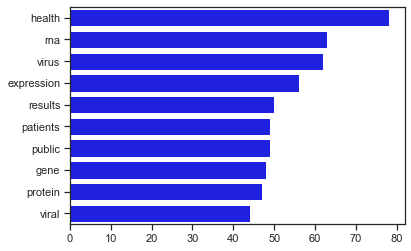

In [31]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');


Search Specific words

In [32]:
# Show frequency of a specific word
fdist["viral"]

44

In [33]:
pip install wordcloud


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


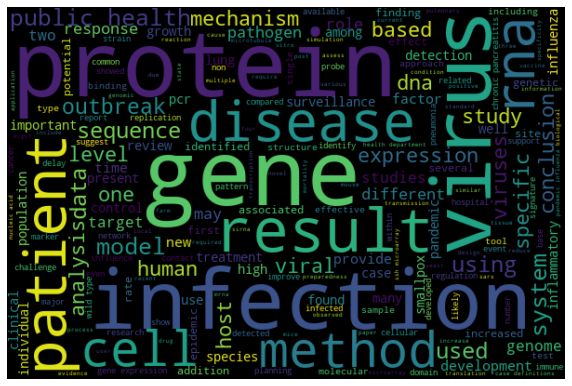

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

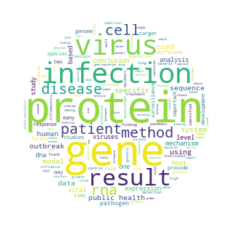

In [35]:
#Different style:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

### Sentiment analysis 

## VADER lexicon
NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

## Sentiment Intensity Analyzer
Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

In [36]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

## Polarity scores
Use the polarity_scores method:

In [38]:
metadata['polarity'] = metadata['text_string_fdist'].apply(lambda x: analyzer.polarity_scores(x))
metadata.tail(3)

<ipython-input-38-f74a03baace2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['polarity'] = metadata['text_string_fdist'].apply(lambda x: analyzer.polarity_scores(x))


,title,abstract,text,text_token,text_string,text_string_fdist,polarity
97,Efficient replication of pneumonia virus of mi...,Pneumonia virus of mice (PVM; family Paramyxov...,efficient replication of pneumonia virus of mi...,"[efficient, replication, pneumonia, virus, mic...",efficient replication pneumonia virus mice pvm...,efficient replication pneumonia virus mice pvm...,"{'neg': 0.057, 'neu': 0.862, 'pos': 0.081, 'co..."
98,Designing and conducting tabletop exercises to...,"BACKGROUND: Since 2001, state and local health...",designing and conducting tabletop exercises to...,"[designing, conducting, tabletop, exercises, a...",designing conducting tabletop exercises assess...,designing conducting tabletop exercises assess...,"{'neg': 0.05, 'neu': 0.843, 'pos': 0.107, 'com..."
99,Transcript-level annotation of Affymetrix prob...,BACKGROUND: The wide use of Affymetrix microar...,transcript-level annotation of affymetrix prob...,"[transcript, level, annotation, affymetrix, pr...",transcript level annotation affymetrix probese...,transcript level annotation affymetrix probese...,"{'neg': 0.014, 'neu': 0.86, 'pos': 0.126, 'com..."


## Transform data
Change data structure

In [39]:
metadata1 = pd.concat([metadata['polarity'].apply(pd.Series)], axis=1)
metadata1.head(3)

,neg,neu,pos,compound
0,0.092,0.886,0.022,-0.8779
1,0.125,0.828,0.048,-0.7717
2,0.036,0.910,0.054,0.1531


In [40]:
# Create new variable with sentiment "neutral," "positive" and "negative"
metadata1['sentiment'] = metadata1['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
metadata1.head()

,neg,neu,pos,compound,sentiment
0,0.092,0.886,0.022,-0.8779,negative
1,0.125,0.828,0.048,-0.7717,negative
2,0.036,0.910,0.054,0.1531,positive
3,0.000,0.942,0.058,0.3400,positive
4,0.000,0.949,0.051,0.4939,positive


## Analyze data
Title with highest positive sentiment

In [41]:
metadata1.loc[metadata1['compound'].idxmax()].values

array([0.047, 0.609, 0.344, 0.995, 'positive'], dtype=object)

Title with highest negative sentiment

In [42]:
metadata1.loc[metadata1['compound'].idxmin()].values

array([0.282, 0.661, 0.057, -0.9927, 'negative'], dtype=object)

## Visualize data

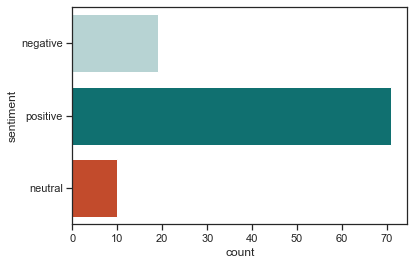

In [43]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=metadata1, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

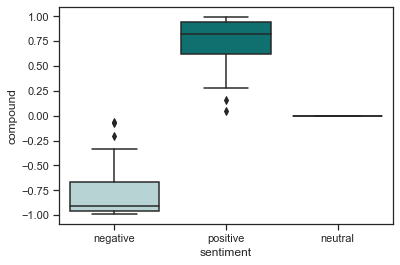

In [44]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=metadata1);

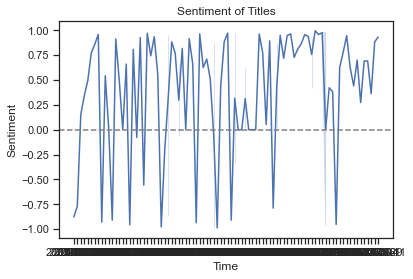

In [45]:
# Lineplot
g = sns.lineplot(x=df['publish_time'], y=metadata1['compound'])


g.set(title='Sentiment of Titles')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');

In [46]:
metadata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   neg        100 non-null    float64
 1   neu        100 non-null    float64
 2   pos        100 non-null    float64
 3   compound   100 non-null    float64
 4   sentiment  100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB
